In [124]:
import sqlite3
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
con = sqlite3.connect("database.sqlite")
cur = con.cursor()

In [126]:
query = """SELECT name FROM sqlite_master  
  WHERE type='table'"""
tables_list=pd.read_sql_query(query,con)
tables_list.head(10)

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [127]:
cur.execute("select * from country")
cur.fetchall()

[(1, 'Belgium'),
 (1729, 'England'),
 (4769, 'France'),
 (7809, 'Germany'),
 (10257, 'Italy'),
 (13274, 'Netherlands'),
 (15722, 'Poland'),
 (17642, 'Portugal'),
 (19694, 'Scotland'),
 (21518, 'Spain'),
 (24558, 'Switzerland')]

In [128]:
query1 = "select * from country"
country_list = pd.read_sql_query(query1,con)
country_list.head(100)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [129]:
query2 = "select * from Player"
player_list = pd.read_sql_query(query2,con)
player_list.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [130]:
player_list.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [131]:
query3 = "select * from Player_Attributes"
player_attributes_list = pd.read_sql_query(query3,con)
player_attributes_list.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [132]:
player_attributes_list.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [133]:
player_attributes_list.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003368,0.001987,-0.002875,0.001217,-0.019149,-0.007882,-0.011295,-0.006132,-0.006343,...,-0.007731,-0.010620,-0.009555,-0.012196,-0.010689,0.013980,0.010436,0.008645,0.013563,0.014152
player_fifa_api_id,0.003368,1.000000,0.554620,-0.274089,-0.027619,-0.064183,-0.028010,-0.104655,-0.064219,-0.087743,...,-0.164171,-0.182479,-0.077979,-0.073212,-0.054321,-0.091737,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.001987,0.554620,1.000000,-0.322389,0.010991,-0.110620,-0.060387,-0.129488,-0.087320,-0.130140,...,-0.188077,-0.164783,-0.089998,-0.086596,-0.072889,-0.071495,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.002875,-0.274089,-0.322389,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,...,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.001217,-0.027619,0.010991,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,...,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,-0.019149,-0.064183,-0.110620,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,...,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,-0.007882,-0.028010,-0.060387,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,...,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.011295,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,...,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,-0.006132,-0.064219,-0.087320,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,...,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.006343,-0.087743,-0.130140,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,...,0.689852,0.711830,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.279030,-0.490968,-0.492979


<AxesSubplot:>

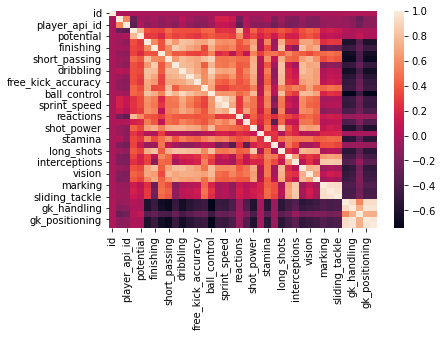

In [134]:
sns.heatmap(player_attributes_list.corr())

In [135]:
query4 = "SELECT player_name,height,weight,overall_rating,shot_power,potential,short_passing,ball_control,long_passing,reactions,vision FROM Player JOIN Player_Attributes on Player.id = Player_Attributes.id WHERE overall_rating>85 "
legends_table = pd.read_sql_query(query4,con)
legends_table.head(20)

,player_name,height,weight,overall_rating,shot_power,potential,short_passing,ball_control,long_passing,reactions,vision
0,Faysel Kasmi,167.64,143,86,94,90,64,84,49,84,78
1,Fazli Kocabas,185.42,176,86,94,90,64,84,49,84,78
2,Fede Vico,167.64,141,89,96,91,65,88,49,90,78
3,Lorenzo Pellegrini,185.42,181,86,87,90,92,94,80,86,90
4,Lorenzo Pique,180.34,172,87,90,90,92,94,80,89,90
5,Lorenzo Squizzi,190.50,196,87,88,90,89,94,70,89,90
6,Lorenzo Stovini,185.42,176,87,82,90,88,94,82,80,90
7,Lorenzo Tonelli,182.88,172,87,82,91,88,94,82,80,90
8,Manu Lanzarote,177.80,152,88,48,91,77,76,66,86,76
9,Manu Molina,177.80,159,91,65,92,54,69,34,78,76


In [136]:
legends_table.count()

player_name       20
height            20
weight            20
overall_rating    20
shot_power        20
potential         20
short_passing     20
ball_control      20
long_passing      20
reactions         20
vision            20
dtype: int64

In [137]:
query5 = "select League.country_id,League.name,Country.name,Country.id from League JOIN Country on League.country_id = Country.id"
country_league = pd.read_sql_query(query5,con)
country_league.head()

,country_id,name,name,id
0,1,Belgium Jupiler League,Belgium,1
1,1729,England Premier League,England,1729
2,4769,France Ligue 1,France,4769
3,7809,Germany 1. Bundesliga,Germany,7809
4,10257,Italy Serie A,Italy,10257


In [138]:
query6 = "select * from Team_Attributes"
team_attributes=pd.read_sql_query(query6,con)
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [139]:
team_attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [140]:
team_attributes.corr()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
id,1.000000,-0.010499,-0.089566,-0.029374,0.049304,-0.019056,0.017920,0.020098,-0.020446,-0.013450,-0.052219,-0.047561
team_fifa_api_id,-0.010499,1.000000,0.164102,-0.017363,0.106398,0.007683,-0.025713,-0.108358,0.002993,-0.059760,0.000522,-0.071675
team_api_id,-0.089566,0.164102,1.000000,0.004337,0.039066,0.001415,-0.005228,-0.065554,-0.072711,-0.064901,-0.030905,-0.071161
buildUpPlaySpeed,-0.029374,-0.017363,0.004337,1.000000,0.067988,0.395506,0.319162,0.191687,0.072098,0.046397,0.160569,0.067019
buildUpPlayDribbling,0.049304,0.106398,0.039066,0.067988,1.000000,-0.123613,0.080242,0.055541,0.120051,-0.017749,-0.035893,0.085702
buildUpPlayPassing,-0.019056,0.007683,0.001415,0.395506,-0.123613,1.000000,0.220367,0.231088,-0.077325,-0.050487,0.122451,0.063150
chanceCreationPassing,0.017920,-0.025713,-0.005228,0.319162,0.080242,0.220367,1.000000,0.246528,0.112497,0.203158,0.145212,0.150143
chanceCreationCrossing,0.020098,-0.108358,-0.065554,0.191687,0.055541,0.231088,0.246528,1.000000,-0.012576,0.087108,0.098874,0.131515
chanceCreationShooting,-0.020446,0.002993,-0.072711,0.072098,0.120051,-0.077325,0.112497,-0.012576,1.000000,0.185603,0.116578,0.129166
defencePressure,-0.013450,-0.059760,-0.064901,0.046397,-0.017749,-0.050487,0.203158,0.087108,0.185603,1.000000,0.422493,0.508464


<AxesSubplot:>

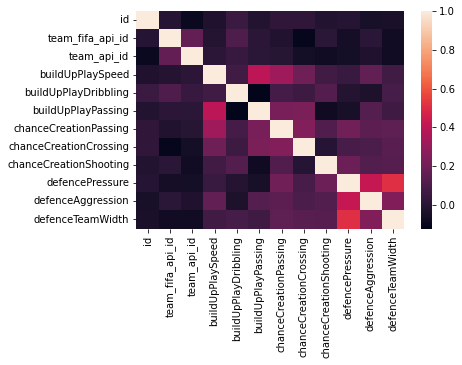

In [141]:
sns.heatmap(team_attributes.corr())

In [142]:
query7 = "select Player.id,Player.player_name,overall_rating,Player_Attributes.id,Player_Attributes.attacking_work_rate from Player join Player_Attributes on Player.id=Player_Attributes.id WHERE overall_rating >70 group by attacking_work_rate order by overall_rating DESC"
grouped_by_legends = pd.read_sql_query(query7,con)
grouped_by_legends.head(20)

,id,player_name,overall_rating,id,attacking_work_rate
0,6,Aaron Hunt,74,6,high
1,13,Aaron Muirhead,73,13,medium
2,610,Ander Herrera,73,610,low
3,676,Andre-Pierre Gignac,73,676,None
4,479,Alexandre Di Gregorio,73,479,None


In [143]:
cur.execute("select count(*) id from Team")
cur.fetchall()

[(299,)]

In [144]:
query8 = "select AVG(overall_rating) from Player_Attributes"
df=pd.read_sql_query(query8,con)
df.head()

,AVG(overall_rating)
0,68.600015


In [145]:
query9 = "select overall_rating,preferred_foot from Player_Attributes where overall_rating>68 group by preferred_foot"
df1=pd.read_sql_query(query9,con)
df1.head()

,overall_rating,preferred_foot
0,74,left
1,69,right


In [148]:
query10 = "create view Legends_player as select Player_Attributes.overall_rating,Player.player_name from Player_Attributes join Player on Player_Attributes.id=Player.id where overall_rating>80"
df2 = pd.read_sql_query(query10,con)
df2.head()

DatabaseError: Execution failed on sql 'create view Legends_player as select Player_Attributes.overall_rating,Player.player_name from Player_Attributes join Player on Player_Attributes.id=Player.id where overall_rating>80': table Legends_player already exists